In [1]:
%pip install gurobipy
import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
rnd = np.random
rnd.seed(51)

In [3]:
n = 10  # number of clients
f = 2  # number of charging stations
b = 4 #number of battery swapping stations
num_points = n + f + b
num_of_copies = 2
# Generate random coordinates for xc and yc
xc = np.random.rand(num_points) * 200
yc = np.random.rand(num_points) * 100

In [5]:
sum_xc=0
sum_yc=0
for i in xc:
    sum_xc+=i
for i in yc:
    sum_yc+=i
sum_xc/=num_points
sum_yc/=num_points

xc = np.insert(xc, 0, sum_xc)
yc = np.insert(yc, 0, sum_yc)

# Randomly select f points from the generated points
selected_indices = np.random.choice(np.setdiff1d(np.arange(1, num_points), 0), f+b, replace=False)
selected_xc = xc[selected_indices]
selected_yc = yc[selected_indices]

# Remove the selected points from xc and yc
xc = np.delete(xc, selected_indices)
yc = np.delete(yc, selected_indices)
xc=np.append(xc,xc[0])
yc=np.append(yc,yc[0])

selected_indices_f = np.random.choice(f+b, f, replace=False)
selected_xc_f = selected_xc[selected_indices_f]
selected_yc_f = selected_yc[selected_indices_f]

selected_xc = np.delete(selected_xc, selected_indices_f)
selected_yc = np.delete(selected_yc, selected_indices_f)
# print(xc)
# print(selected_xc_f)
# print(selected_xc)
b_x_coordinates=selected_xc;
b_y_coordinates=selected_yc;

num_of_copies = 2
# Append copies of each selected point after the first n points

for i in range(f):
    for _ in range(num_of_copies):
        xc = np.append(xc, selected_xc_f[i])
        yc = np.append(yc, selected_yc_f[i])

for i in range(b):
    for _ in range(num_of_copies):
        xc = np.append(xc, b_x_coordinates[i])
        yc = np.append(yc, b_y_coordinates[i])

print(xc)
print(yc)

[122.22535927  56.84259975 189.86756133  31.53403375  77.59459248
  43.63651224  82.04959722  78.89783839  68.66073451 135.1462831
 135.1462831   49.96628183  49.96628183 117.99873529 117.99873529
  34.8686772   34.8686772  128.8039454  128.8039454  122.22535927
  68.66073451  68.66073451 129.34910884 129.34910884   9.5451566
   9.5451566    8.94243644   8.94243644  97.55915826  97.55915826
  78.89783839  78.89783839]
[74.80471985 75.46383918 72.87108304 56.47609387 71.41213954 86.94905599
 60.3723935  52.52259463 44.54105029 32.3548296  32.3548296  30.78997273
 30.78997273 58.23560806 58.23560806 79.51987286 79.51987286  6.02748056
  6.02748056 74.80471985 44.54105029 44.54105029 34.99918982 34.99918982
 37.21481787 37.21481787 29.22017587 29.22017587 63.91391136 63.91391136
 52.52259463 52.52259463]


In [5]:
# xc = [65.53728031, 54.44603955, 88.12234968, 102.51692288, 31.34438071, 105.3051593, 65.53728031, 124.89947439, 124.89947439, 13.08142115, 13.08142115, 64.58673463, 64.58673463, 5.53304047, 5.53304047]
# yc = [49.32313992, 97.1122129, 54.21251519, 77.75853955, 6.09951352, 26.31270804, 49.32313992, 43.02173031, 43.02173031, 54.31221068, 54.31221068, 83.76162527, 83.76162527, 1.3172038, 1.3172038]

Text(120.22535927387639, 72.80471984555756, 'Depo')

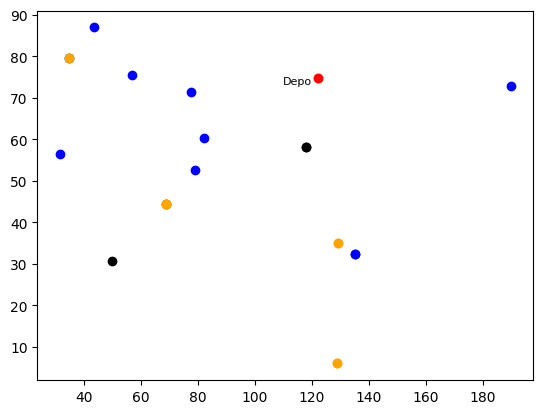

In [6]:
plt.scatter(xc[1:n+1], yc[1:n+1], c = 'blue')
plt.scatter(xc[n+2:n+2+f*num_of_copies],yc[n+2:n+2+f*num_of_copies], c= 'black')
plt.scatter(xc[n+2+f*num_of_copies:n+2+f*num_of_copies+b*num_of_copies],yc[n+2+f*num_of_copies:n+2+f*num_of_copies+b*num_of_copies], c= 'orange')
plt.scatter(xc[0], yc[0], c='r')
plt.text(xc[0]-2, yc[0]-2, 'Depo', fontsize=8, color='black', ha='right', va='bottom')

In [9]:
I = [i for i in range(1, n+1)] #Number of nodes/locations
F = [i for i in range(n+2,n+1+num_of_copies*f+1)]
B = [i for i in range(n+1+num_of_copies*f+1,n+1+num_of_copies*f+num_of_copies*b+1)]
F_comb = F + B
N = I + F + B
print(I)
print(F)
F_depo = [0] + F + B
I_depo = [0] + N
I_dest = N + [n+1]
I_depo_dest = N + [0] + [n+1]
num_of_vehicles = 5
print(I)
print(F)
print(B)
K = [i for i in range(1,num_of_vehicles+1)]
A = [(i, j, k) for i in I_depo for j in I_dest for k in K if i != j] 
print(A)
dist = [(i, j) for i in I_depo for j in I_dest if i != j] 
total_with_vehicles = [(i,k) for i in I_depo_dest for k in K]
kthVehicleCharging = [(i,k) for i in F for k in K]
kthVehicleSwapping = [(i,k) for i in B for k in K]

c = {(i, j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i, j in dist} 
lb = 14
ub = 20
C = {k: rnd.uniform(lb, ub) for k in K}
max_dist_limit = {k: rnd.uniform(lb*15,ub*20) for k in K}

S = 0.002  
thresholds = [50, 100, 150, 200]
multipliers = [1.0, 1.19, 1.29, 1.39, 1.49]
ranges=4
t_base = {}

for i, j, k in A:
    avg_value = c[i,j]
    if(c[i,j]<thresholds[0]):
        for k in K:
                t_base[i, j, k] = C[k] *S* multipliers[0]*c[i,j]
    elif(c[i,j]<=200):
         for x in range(0,ranges-1):
              if(c[i,j]>=thresholds[x] and c[i,j]<=thresholds[x+1]):
                           for k in K:
                               t_base[i, j, k] = C[k] *S* multipliers[x+1]*c[i,j]
    else:
         for k in K:
                t_base[i, j, k] = C[k] *S* multipliers[ranges-1]*c[i,j]

q = {i: rnd.uniform(1, 10) for i in N}
H = 50 
max_value = max(c.values())
Q = [0]*(k+1)
fastTime = [0]*(n+1+num_of_copies*f+1)
slowTime = [0]*(n+1+num_of_copies*f+1)
mediumTime = [0]*(n+1+num_of_copies*f+1)
batSwapTime = [0]*(n+1+num_of_copies*f+num_of_copies*b+1)
fastChargerCost = [0]*(n+1 + num_of_copies*f+1)
mediumChargerCost = [0]*(n+1+num_of_copies*f+1)
slowChargerCot = [0]*(n+1 + num_of_copies*f+1)
batterySwapCost = [0]*(n+1+num_of_copies*f+num_of_copies*b+1)
fastStatNum = [0]*(n+1+num_of_copies*f+1)
mediumStatNum = [0]*(n+1+num_of_copies*f+1)
slowStatNum = [0]*(n+1+num_of_copies*f+1)
batteryStatNum = [0]*(n+1+num_of_copies*f+num_of_copies*b+1)

# Vehicle charging min and max constraints
minChargeValue = 3000
maxChargeValue = 5000

# Time constraints for fast 
minFastTimeValue = 2.0
maxFastTimeValue = 3.0

#Time constraint for medium
minMediumTimeValue = 4.0
maxMediumTimeValue = 5.0

#TIme constraint for slow
minSlowTimeValue = 7.0
maxSlowTImeValue = 8.0

#Time constraint for swapping battery
minBatSwapTime = 0.5
maxBatSwapTIme = 0.8

#Cost constraint for fast charging
minFastChargerCost = 300.0
maxFastChargerCost = 400.0

#Cost constraint for medium charging
minMediumChargerCost = 200.0
maxMediumChargerCost = 300.0

#Cost constraint for slow charging
minSlowChargerCost = 100.0
maxSlowChargerCost = 200.0

#Battery swap cost 
minBatterySwapCost = 550.0
maxBatterySwapCost = 650.0

for i in range(1,k+1):
      Q[i] = rnd.uniform(minChargeValue, maxChargeValue)

for i in range(n+2, n+1+num_of_copies*f+1):
      fastTime[i] = rnd.uniform(minFastTimeValue,maxFastTimeValue)
      mediumTime[i] = rnd.uniform(minMediumTimeValue, maxMediumTimeValue)
      slowTime[i] = rnd.uniform(minSlowTimeValue, maxSlowTImeValue)
      fastChargerCost[i] = rnd.uniform(minFastChargerCost, maxFastChargerCost)
      mediumChargerCost[i] = rnd.uniform(minMediumChargerCost, maxMediumChargerCost)
      slowChargerCot[i] = rnd.uniform(minSlowChargerCost, maxSlowChargerCost)
      fastStatNum[i] = 1
      slowStatNum[i] = 1
      mediumStatNum[i] = 1

for i in range(n+1+num_of_copies*f+1,n+1+num_of_copies*f+num_of_copies*b+1):
      batSwapTime[i] = rnd.uniform(minBatSwapTime, maxBatSwapTIme)
      batterySwapCost[i] = rnd.uniform(minBatterySwapCost,maxBatterySwapCost)
      batteryStatNum[i] = 1

#Includes different charging times:
# 0-30 at a rate of 3500/hour
# 30-50 at a rate of 300/hour
# 50-80 at a rate of 250/hour
# 80-100 at a rate of 200/hour

# Q=10000
# full_charging_time = Q*(0.3/350 + 0.2/300 + 0.2/250 + 0.2/200)/2
q[0]=0
for i in range(n+1,n+2+num_of_copies*(f+b)):
    q[i] = 0

#For aux
auxVariable = [(i,j,k) for i in I_depo for j in F_comb if i!=j for k in K]

# print(I)
# print(F)
# print(B)
# print(I_dest)
# print(I_depo)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[12, 13, 14, 15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[12, 13, 14, 15]
[16, 17, 18, 19, 20, 21, 22, 23]
[(0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (0, 2, 5), (0, 3, 1), (0, 3, 2), (0, 3, 3), (0, 3, 4), (0, 3, 5), (0, 4, 1), (0, 4, 2), (0, 4, 3), (0, 4, 4), (0, 4, 5), (0, 5, 1), (0, 5, 2), (0, 5, 3), (0, 5, 4), (0, 5, 5), (0, 6, 1), (0, 6, 2), (0, 6, 3), (0, 6, 4), (0, 6, 5), (0, 7, 1), (0, 7, 2), (0, 7, 3), (0, 7, 4), (0, 7, 5), (0, 8, 1), (0, 8, 2), (0, 8, 3), (0, 8, 4), (0, 8, 5), (0, 9, 1), (0, 9, 2), (0, 9, 3), (0, 9, 4), (0, 9, 5), (0, 10, 1), (0, 10, 2), (0, 10, 3), (0, 10, 4), (0, 10, 5), (0, 12, 1), (0, 12, 2), (0, 12, 3), (0, 12, 4), (0, 12, 5), (0, 13, 1), (0, 13, 2), (0, 13, 3), (0, 13, 4), (0, 13, 5), (0, 14, 1), (0, 14, 2), (0, 14, 3), (0, 14, 4), (0, 14, 5), (0, 15, 1), (0, 15, 2), (0, 15, 3), (0, 15, 4), (0, 15, 5), (0, 16, 1), (0, 16, 2), (0, 16, 3), (0, 16, 4), (0, 16, 5), (0, 17, 1), (

IndexError: list assignment index out of range

In [8]:
from gurobipy import Model, GRB, quicksum

model = Model('ECVRP')
x = model.addVars(A, vtype=GRB.BINARY, name='x')
u = model.addVars(total_with_vehicles, vtype=GRB.CONTINUOUS,lb=0.0, name='u')
y = model.addVars(total_with_vehicles, vtype=GRB.CONTINUOUS,lb=0.0, ub=Q, name='y')
h = model.addVars(total_with_vehicles, vtype=GRB.CONTINUOUS, name='h')
fastCh = model.addVars(kthVehicleCharging, vtype = GRB.BINARY, name = "fast charging")
mediumCh = model.addVars(kthVehicleCharging, vytpe = GRB.BINARY, name = "meidum charging")
slowCh = model.addVars(kthVehicleCharging, vtype = GRB.BINARY, name = "slow charging")
batterySwap = model.addVars(kthVehicleCharging, vytpe = GRB.BINARY, name = "battery swapping")
aux = model.addVars(auxVariable, vtype = GRB.CONTINUOUS, name = "Auxillary variable")
# t = model.addVars(A,vtype=GRB.CONTINUOUS, lb=0.0, name='t')
# P = model.addVars(variable_charge, vtype = GRB.CONTINUOUS, lb=0, ub=Q, name = 'charge level')
# T = model.addVars(variable_charge, vtype = GRB.CONTINUOUS, lb=0.0, name = 'charging time')

for i,k in u.keys():
    u[i,k].ub = C[k]    
    u[i,k].lb = 0

Tf = 10 
Cost = 2000
Fac = 0.6
Time = 8
model.modelSense = GRB.MINIMIZE
model.setObjective(quicksum(x[i, j, k]*t_base[i,j,k]*u[j,k] for i in I_depo for j in I_dest if i!=j for k in K) +  quicksum(aux[i,j,k]*(Q[k] - y[j,k]) for i,j,k in auxVariable))
model.addConstrs(aux[i,j,k]==x[i,j,k]*(fastCh[j,k]*fastTime[j] + slowCh[j,k]*slowTime[j] + mediumCh[j,k]*mediumTime[j] + batterySwap[j,k]*batSwapTime[j]) for i,j,k in auxVariable)
model.addConstrs((quicksum(x[i, j, k] for k in K for j in I_dest if i!=j) == 1 for i in I), name='outgoing')
model.addConstrs((quicksum(x[i, j, k] for k in K for j in I_dest if i!=j) <= 1 for i in F_comb), name='charging_outgoing')
model.addConstrs((quicksum(x[0, j, k] for j in N) <= 1 for k in K), name='charging_outgoing')
model.addConstrs((quicksum(x[i, j, k] for i in I_depo if i!=j)-quicksum(x[j,i,k] for i in I_dest if i!=j) == 0 for j in N for k in K), name='blockage')
model.addConstrs((u[j,k]<=u[i,k]-q[i]*x[i,j,k]+ C[k]*(1-x[i,j,k]) for i in I_depo for j in I_dest if i!=j for k in K), name='weight_transfer')
model.addCosntrs(y[j,k]<=Q[k] - h[i,k]*c[i,j]*x[i,j,k] for i in F for j in I_dest if i!=j for k in K)
model.addConstrs((u[0,k]<=C[k] for k in K), name='Specifying_constant_weight')
model.addConstrs((y[0,k]==Q for k in K), name='Specifying_constant_charge')
model.addConstrs((y[j,k]<=y[i,k]-h[i,k]*c[i,j]*x[i,j,k]+Q*(1-x[i,j,k]) for i in I for j in I_dest  if i!=j for k in K), name = 'charge_left')
model.addConstrs(h[i,k] == H + u[i,k] / C[k] for i in I_depo_dest for k in K)
model.addConstrs(quicksum(fastCh[i,k] for k in K)<=fastStatNum[i] for i in F)
model.addConstrs(quicksum(mediumCh[i,k] for k in K)<=mediumStatNum[i] for i in F)
model.addConstrs(quicksum(slowCh[i,k] for k in K)<=slowStatNum[i] for i in F)
model.addConstrs(quicksum(batterySwap[i,k] for k in K)<=batteryStatNum[i] for i in B)
model.addConstrs(quicksum(fastCh[i,k]+mediumCh[i,k]+slowCh[i,k] + batterySwap[i,k])<=1 for i in F_comb for k in K)
Temp = 323
theta = 0.1
H = H*0.8 + Temp*(theta)
                         # model.addConstrs(t[i,j,k] == t_base[i,j,k]*u[i,k] for i in I_depo for j in I_dest if i!=j for k in K)
model.addConstrs()
model.Params.MIPGap = 0.1
model.Params.TimeLimit = 400 # seconds
model.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-07
Set parameter MIPGap to value 0.1
Set parameter TimeLimit to value 400
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6500U CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 5342 rows, 5430 columns and 22700 nonzeros
Model fingerprint: 0x2531c030
Model has 2535 quadratic objective terms
Model has 1105 quadratic constraints
Variable types: 2895 continuous, 2535 integer (2535 binary)
Coefficient statistics:
  Matrix range     [5e-02, 2e+02]
  QMatrix range    [1e+00, 2e+02]
  QLMatrix range   [1e+00, 1e+04]
  Objective range  [2e+00, 8e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [1e+00, 1e+04]
  RHS range        [1e+00, 1e+04]
  QRHS range       [3e+02, 1e+04]
Presolve removed 666 rows and 507 columns
Presolve time: 0.16s
Presolved: 9055 rows, 8257

In [9]:
# from gurobipy import Model, GRB, quicksum

# model = Model('ECVRP')
# x = model.addVars(A, vtype=GRB.BINARY, name='x')
# u = model.addVars(total_with_vehicles, vtype=GRB.CONTINUOUS,lb=0.0, name='u')
# y = model.addVars(total_with_vehicles, vtype=GRB.CONTINUOUS,lb=0.0, ub=Q, name='y')
# h = model.addVars(total_with_vehicles, vtype=GRB.CONTINUOUS, name='h')
# t = model.addVars(A,vtype=GRB.CONTINUOUS, lb=0.0, name='t')
# P = model.addVars(variable_charge, vtype = GRB.CONTINUOUS, lb=0, ub=Q, name = 'charge level')
# T = model.addVars(variable_charge, vtype = GRB.CONTINUOUS, lb=0.0, name = 'charging time')

# for i,k in u.keys():
#     u[i,k].ub = C[k]    
#     u[i,k].lb = 0

# Tf = 10 
# Cost = 2000
# Fac = 0.6
# model.modelSense = GRB.MINIMIZE
# model.setObjective(quicksum(x[i, j, k]*(t[i,j,k]) for i, j, k in A) +  quicksum(x[i,j,k]*(battery_swapping_time) for i in I_depo for j in B if i!=j for k in K) + quicksum(x[i,j,k]*T[j,k] for i in I_depo for j in F if i!=j for k in K))

# #Ignoring partial charging for now
# #Max charging for each vehicle station would be maximum Q only, no varialbes in that

# model.addConstrs((quicksum(x[i, j, k] for k in K for j in I_dest if i!=j) == 1 for i in I), name='outgoing')
# model.addConstrs((quicksum(x[i, j, k] for k in K for j in I_dest if i!=j) <= 1 for i in F_comb), name='charging_outgoing')
# model.addConstrs((quicksum(x[0, j, k] for j in N) <= 1 for k in K), name='charging_outgoing')
# model.addConstrs((quicksum(x[i, j, k] for i in I_depo if i!=j)-quicksum(x[j,i,k] for i in I_dest if i!=j) == 0 for j in N for k in K), name='blockage')
# model.addConstrs((u[j,k]<=u[i,k]-q[i]*x[i,j,k]+ C[k]*(1-x[i,j,k]) for i in I_depo for j in I_dest if i!=j for k in K), name='weight_transfer')
# model.addConstrs(quicksum(x[i,j,k]*c[i,j] for i in I_depo for j in I_dest if i!=j)<=max_dist_limit[k] for k in K)
# model.addConstrs((quicksum(x[i,j,k]*t[i,j,k] for i in I_depo for j in I_dest if i!=j) + quicksum(x[i,j,k]*(T[j,k]) for i in I_depo for j in F if i!=j)+quicksum(x[i,j,k]*(battery_swapping_time) for i in I_depo for j in B if i!=j))<=max_time_limit for k in K)

# # for i in F:
# #     for k in K:
# #         model.addGenConstrPWL(P[i, k], T[i, k], [0, 0.5 * Q, 0.8 * Q, Q], [0, 0.5 * Q * 0.2, 0.8 * Q * 0.5, 0.8 * Q])

# Temp = 323
# theta = 0.1
# H = H*0.8 + Temp*(theta)
# model.addConstrs(h[i,k] == H + u[i,k] / C[k] for i in I_depo_dest for k in K)
# model.addConstrs((y[j,k]<=P[i,k]-h[i,k]*c[i,j]*x[i,j,k] + Q*(1-x[i,j,k]) for i in F for j in I_dest  if i!=j for k in K), name='after leaving from charging station')
# model.addConstrs(t[i,j,k] == t_base[i,j,k]*u[i,k] for i in I_depo for j in I_dest if i!=j for k in K)
# model.addConstrs((y[j,k]<=y[i,k]-h[i,k]*c[i,j]*x[i,j,k]+Q*(1-x[i,j,k]) for i in I for j in  I_dest  if i!=j for k in K), name = 'charge_left')
# model.addConstrs((P[i,k]>=y[i,k] for i in F for k in K), name='charge_lower_bound')
# model.addConstrs((P[i,k]<=Q for i in F for k in K), name='charge_lower_bound')
# model.addConstrs((u[0,k]==C[k] for k in K), name='Specifying_constant_weight')
# model.addConstrs((y[0,k]==Q for k in K), name='Specifying_constant_charge')
# model.addConstrs(T[i,k] == Fac*P[i,k] for i in F for k in K)

# model.Params.MIPGap = 0.1
# model.Params.TimeLimit = 400 # seconds
# model.optimize()

In [10]:
# model.computeIIS()
model.write("model14.lp")

In [11]:
# for var_name in u:
#     u_var = u[var_name]
#     print(f"{var_name} = {u_var.X}")

In [12]:
# for var_name in h:
#     h_var = h[var_name]
#     print(f"{var_name} = {h_var.X}")

In [13]:
# for var_name in y:
#     y_var = y[var_name]
#     print(f"{var_name} = {y_var.X}")

In [14]:
active_arcs = [a for a in A if x[a].x > 0.99]

values = {}
vehicle_dist={}
vehicle_time={}
for i,j,k in active_arcs:
    if(k not in vehicle_dist):
      vehicle_dist[k] = c[i,j]
      vehicle_time[k] = t[i,j,k].X
    else:
         vehicle_dist[k]+=c[i,j]
         vehicle_time[k]+=t[i,j,k].X

    if i!=0:
        values[i]=(j,k)
        
colors = ['magenta', 'green', 'red', 'yellow', 'cyan']
def rec(i, j,k,col):
        print(i,j,k)
        mid_x = (xc[i] + xc[j]) / 2
        mid_y = (yc[i] + yc[j]) / 2
        plt.arrow(xc[i], yc[i], mid_x - xc[i], mid_y - yc[i],
                  head_width=2, head_length=2, fc='red', ec='red')   
        plt.plot([xc[i],xc[j]], [yc[i], yc[j]], c = colors[col])
        if(j==n+1):
             return
        rec(j,values[j][0],values[j][1],col)


8.942436440589209
56.8425997480579
189.86756133000102
31.534033754752787
77.59459248455246
97.55915826256812
43.63651223664213
129.3491088410117
82.04959722032127
9.545156599285832
0 2 4
2 6 4
6 21 4
21 11 4
0 3 3
3 13 3
13 11 3
0 4 1
4 10 1
10 11 1
0 5 2
5 7 2
7 20 2
20 11 2
0 9 5
9 12 5
12 1 5
1 17 5
17 8 5
8 11 5


NameError: name 'T' is not defined

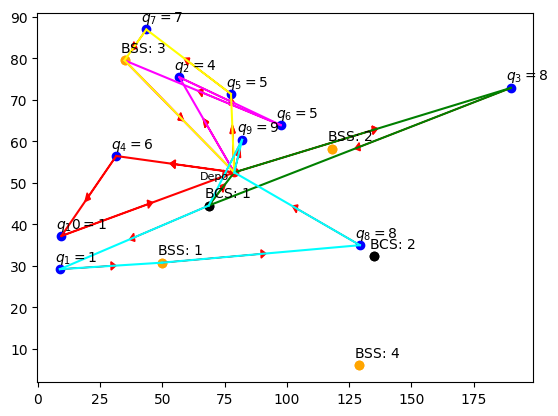

In [16]:
active_arcs = [a for a in A if x[a].x > 0.99]

# print(active_arcs)
plt.scatter(xc[1:n+1], yc[1:n+1], c = 'blue')
plt.scatter(xc[n+2:n+2+f*num_of_copies],yc[n+2:n+2+f*num_of_copies], c= 'black')
plt.scatter(xc[n+2+f*num_of_copies:n+2+f*num_of_copies+b*num_of_copies],yc[n+2+f*num_of_copies:n+2+f*num_of_copies+b*num_of_copies], c= 'orange')
plt.scatter(xc[0], yc[0], c='r')
plt.text(xc[0]-2, yc[0]-2, 'Depo', fontsize=8, color='black', ha='right', va='bottom')

visited = []
for i in I:
    print(xc[i])
    if(xc[i] not in visited):
      plt.annotate('$q_%d = %d$' % (i,q[i]), (xc[i]-2, yc[i]+2))
      visited.append(xc[i])

count=1
for i in F:
    if(xc[i] not in visited):
      plt.annotate('BCS: $%d$' % count, (xc[i]-2, yc[i]+2))
      count+=1
      visited.append(xc[i])

count=1
for i in B:
    if(xc[i] not in visited):
      plt.annotate('BSS: $%d$' % count, (xc[i]-2, yc[i]+2))
      count+=1
      visited.append(xc[i])

col=0
for i,j,k in active_arcs:
    if(i==0):
        mid_x = (xc[i] + xc[j]) / 2
        mid_y = (yc[i] + yc[j]) / 2
        plt.arrow(xc[i], yc[i], mid_x - xc[i], mid_y - yc[i],
                  head_width=2, head_length=2, fc='red', ec='red')        
        rec(i,j,k,col)
        col+=1

total_charging_time=0
for i,j,k in active_arcs:
   total_charging_time+=T[i,j].x
   print(t[i,j,k].x)
  
print("aman")
print(total_charging_time)
plt.title('With full charging: ')
plt.show()
